In [1]:
N = 15

**Step 1**

In [2]:
m = 7
from math import gcd
if gcd(m,N) != 1:
    print('problem solved')
else:
    print('proceed to step 2')

proceed to step 2


**Step 2 use a quantum computer to determine the period of f(x)m^x mod N**

**step 2.0**

In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

**Step 2.1, 2.2**

In [4]:
f = []
for i in range(2**4):
    f.append((m**i%N))

In [5]:
f

[1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

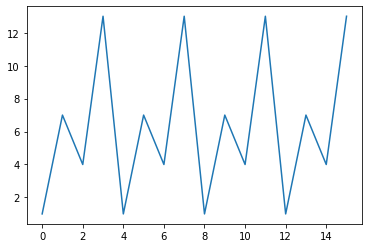

In [8]:
x = np.arange(0,16,1)
plt.plot(x,(m**x)%N)

In [9]:
for i in range(2**4):
    print('|',f[i],'>','|',i,'>')

| 1 > | 0 >
| 7 > | 1 >
| 4 > | 2 >
| 13 > | 3 >
| 1 > | 4 >
| 7 > | 5 >
| 4 > | 6 >
| 13 > | 7 >
| 1 > | 8 >
| 7 > | 9 >
| 4 > | 10 >
| 13 > | 11 >
| 1 > | 12 >
| 7 > | 13 >
| 4 > | 14 >
| 13 > | 15 >


**step 2.3**

In [10]:
from random import choice
measurement = choice(f)

In [11]:
measurement

4

In [12]:
amplitudes = []
for i in range(2**4):
    amplitudes.append(0)
for i in range(2**4):
    if f[i] == measurement:
        print(i,'=|',bin(i)[2:].zfill(4),'>')
        amplitudes[i]=0.5

2 =| 0010 >
6 =| 0110 >
10 =| 1010 >
14 =| 1110 >


In [13]:
amplitudes

[0, 0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0.5, 0]

In [14]:
qc.initialize(amplitudes,[q[0],q[1],q[2],q[3]])

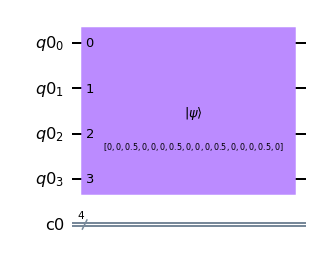

In [15]:
qc.draw('mpl')

**step 2.4**

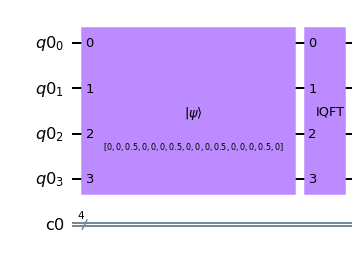

In [16]:
from qiskit.circuit.library import QFT
in_qft = QFT(4,inverse=True)
qc = qc.compose(in_qft)
qc.draw('mpl')

**step 2.5**

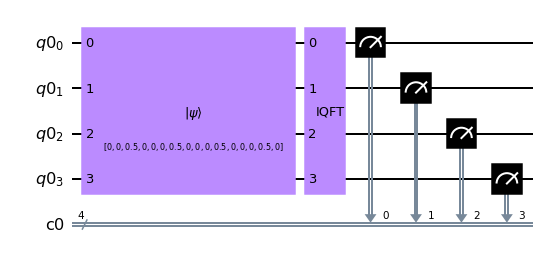

In [18]:
for i in range(4):
    qc.measure(q[i],c[i])
qc.draw('mpl')

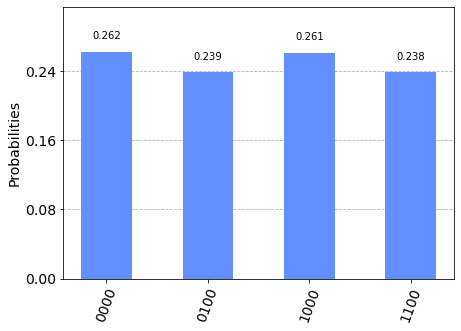

In [19]:
from qiskit.providers.aer import QasmSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
backend = QasmSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [20]:
def result(counts):
    results = []
    for key in counts.keys():
        results.append(int(key,2))
    return results

In [22]:
result(counts)

[4, 0, 8, 12]

**step 3**

In [23]:
a = 2**4/result(counts)[0]

In [24]:
a

4.0

**step 4**

In [25]:
if a%2 != 0:
    print('goto step 1')
else:
    x = (m**(a/2))%N

In [26]:
x

4.0

**step 5**

In [27]:
p = x+1
q =x-1
print(p,q)

5.0 3.0
